# Ridge Regression (L2-регуляризація)

Тут я розгляну:
1. Мотивацію появи Ridge Regression
2. Математичну модель та формулу
3. Інтерпретацію ефекту L2-регуляризації
4. Практичний експеримент із порівнянням Linear vs Ridge



## 1. Мотивація

- Класична лінійна регресія може перенавчатися (overfitting)
- Колінеарність ознак робить коефіцієнти нестабільними
- Ridge Regression додає штраф на великі коефіцієнти (L2-регуляризація) → робить модель стабільнішою та менш чутливою до шуму


## 2. Математика

Цільова функція Ridge Regression:

$J(w) = \text{MSE}(y, Xw) + \lambda \sum_{i=1}^{n} w_i^2$

- $\lambda$ – коефіцієнт регуляризації
- Підвищує штраф за великі значення $w_i$
- Якщо $\lambda = 0$, отримуємо класичну лінійну регресію


## 3. Інтерпретація

- Зменшує вплив колінеарних ознак
- Робить модель стабільнішою
- Зменшує перенавчання
- Не відкидає ознаки повністю, а «стискає» їхні коефіцієнти


## 4. Експеримент: порівняння Linear vs Ridge


In [1]:
# 4.1 Імпорт бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

# Для повторюваності
np.random.seed(42)


In [2]:
# 4.2 Створимо дані
X = np.array([30, 40, 50, 60, 70, 80]).reshape(-1, 1)   # площа квартир
y = np.array([100, 150, 200, 220, 260, 300]) + np.random.randn(6)*5  # ціна з шумом


In [3]:
# 4.3 Навчання класичної лінійної регресії
lin_model = LinearRegression()
lin_model.fit(X, y)

print("Linear Regression:")
print("w0 (intercept):", lin_model.intercept_)
print("w1 (coef):", lin_model.coef_[0])


Linear Regression:
w0 (intercept): -3.0160020253652817
w1 (coef): 3.8133345506835545


In [4]:
# 4.4 Навчання Ridge Regression
ridge_model = Ridge(alpha=10)  # alpha = λ
ridge_model.fit(X, y)

print("Ridge Regression (λ=10):")
print("w0 (intercept):", ridge_model.intercept_)
print("w1 (coef):", ridge_model.coef_[0])


Ridge Regression (λ=10):
w0 (intercept): -1.8243349782766813
w1 (coef): 3.7916678771001253


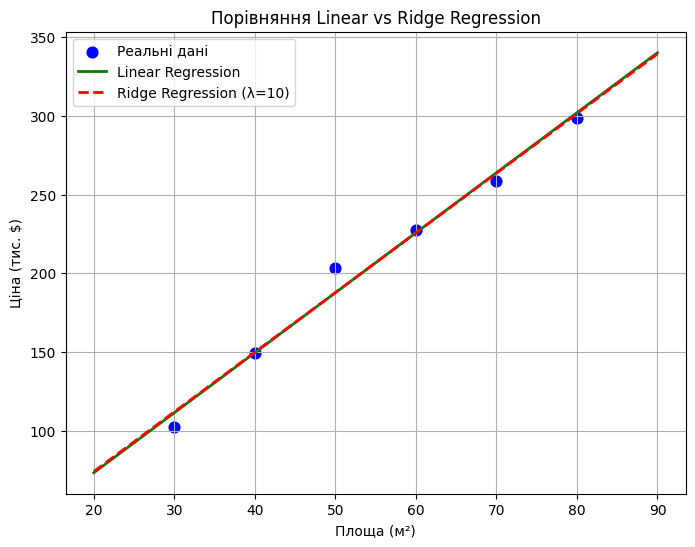

In [6]:
# 4.5 Побудова прогнозів для графіка
X_new = np.linspace(20, 90, 200).reshape(-1, 1)

# Прогнози від обох моделей
y_lin = lin_model.predict(X_new)
y_ridge = ridge_model.predict(X_new)

# Візуалізація
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Реальні дані', s=60)

plt.plot(X_new, y_lin, color='green', linewidth=2, label='Linear Regression')
plt.plot(X_new, y_ridge, color='red', linewidth=2, linestyle='--', label='Ridge Regression (λ=10)')

plt.xlabel('Площа (м²)')
plt.ylabel('Ціна (тис. $)')
plt.title('Порівняння Linear vs Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


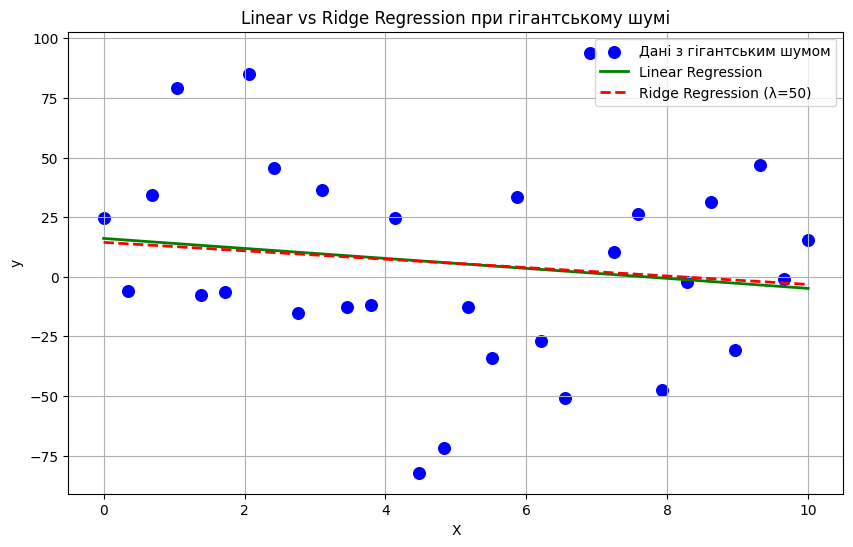

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

# 1. Дані з ОГРОМНИМ шумом
np.random.seed(42)
X = np.linspace(0, 10, 30).reshape(-1, 1)
y = 3*X.squeeze() + np.random.randn(30)*50   # шум *50 (!)

# 2. Моделі
lin_model = LinearRegression().fit(X, y)
ridge_model = Ridge(alpha=50).fit(X, y)  # збільшу λ для ще більшого ефекту

# 3. Прогнози
X_new = np.linspace(0, 10, 200).reshape(-1, 1)
y_lin = lin_model.predict(X_new)
y_ridge = ridge_model.predict(X_new)

# 4. Візуалізація
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Дані з гігантським шумом', s=70)
plt.plot(X_new, y_lin, color='green', linewidth=2, label='Linear Regression')
plt.plot(X_new, y_ridge, color='red', linewidth=2, linestyle='--', label='Ridge Regression (λ=50)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear vs Ridge Regression при гігантському шумі')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
print("Linear coef:", lin_model.coef_[0], "Intercept:", lin_model.intercept_)
print("Ridge coef:", ridge_model.coef_[0], "Intercept:", ridge_model.intercept_)


Linear coef: -2.0952525527747885 Intercept: 16.068917971322076
Ridge coef: -1.7650225308700667 Intercept: 14.417767861798467


## 5. Висновки

- Ridge Regression допомагає боротися з overfitting і колінеарністю
- Додає L2-шраф → зменшує великі коефіцієнти
- Модель стає стабільнішою та краще узагальнює нові дані
- При λ=0 отримуємо класичну лінійну регресію
